# Grundlagen 3: Das Gradientenabstiegs-Verfahren

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from polynom import Polynom

Bei der linearen Regeression versuchen wir, die Verlustfunktion

$$D(m,b) = \sum_{k=1}^N (F(x_k) - y_k)^2 = \sum_{k=1}^N (mx_k + b - y_k)^2$$

durch Anpassung der beiden Parameter $m$ und $b$ zu minimieren. Das ist möglich, da es sich um eine quadratische Funktion handelt, deren Graph ein Paraboloid mit einem eindeutigen Minimum ist.

Dieses Minimum konnten wir direkt bestimmen, in dem wir die gemeinsame Nullstelle der Gleichungen

$$\frac{\partial D}{\partial m} (m,b) = \sum_{k=1}^N 2 x_k(mx_k + b - y_k) = 0 $$
$$\frac{\partial D}{\partial b} (m,b) = \sum_{k=1}^N 2 (mx_k + b - y_k) = 0$$

berechnet haben.

Lässt sich dieses Verfahren auch auf andere Situationen anwenden? Wenn wesentlich mehr als zwei Parameter gibt - und in der KI sind Hunderte / Tausende / Millionen von Parametern die Regel - ist eine exakte Bestimmung eines Minimums zu aufwändig oder gar unmöglich. In diesem Fall bietet sich ein anderes Verfahren an, das vergleichsweise schnell zu einer Lösung führt, die aber in der Regel nicht optimal sein wird: das __Gradientenabstiegs-Verfahren__. Die Idee ist recht einfach, und wir wollen sie am Beispiel der linearen Regression demonstrieren.


### Der Gradientenabstieg

Stellen wir uns vor, dass wir auf dem Paraboloid herumwandern. Nach links und rechts bleiben wir auf gleicher Höhe, aber es gibt auch Richtungen, in denen es auf- oder abwärts geht, und zwar unterschiedlich schnell. Folgen wir der Richtung des schnellestn Abstiegs, so gelangen wir in kürzester Zeit am Minimum.

Wie finden wir diese Richtung? Dazu verwenden wir die Ausdrücke aus den Gleichungssystem und fassen sie zu einem Vektor zusammen:

$$ \text{grad} D = (\frac{\partial D}{\partial m},\frac{\partial D}{\partial b}) (m,b) = (\sum_{k=1}^N 2 x_k(mx_k + b - y_k) , \sum_{k=1}^N 2 (mx_k + b - y_k) )$$

Dieser Vektor heißt der __Gradient__ von $D$, und er zeigt in _die Richtung des steilsten Anstiegs_. In diese Richtung wollen wir nicht laufen, denn wir wollen ja abwärts gehen. Wir aufen daher in die entgegengesetzte Richtung.

Der Algorithmus sieht daher so aus:

1. Wir beginnen an einem Punkt $m,b$ und berechnen  $-\text{grad} D(m,b)$.
2. Wir gehen ein kleines Stück in die Richtung,die durch $-\text{grad} D(m,b)$ definiert ist. Die Länge dieses Stücks können wir mit einem Parameter $\epsilon$ festlegen.
3. Wir wiederholen Schritte 1. und 2., bis wir eine vorgegebene Abbruchbedingung erreicht haben. .B. können wir die Änderungsraten von $D$ überprüfen, oder wir geben eine maximale Anzahl von Iterationen vor.

Das Verfahren ist nicht perfekt, aber erstaunlich effizient und einfacht zu implementieren:

In [2]:
def koeff(x,y):
    """
    Berechnung der Koeffizienten
    """
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x * x)
    sum_xy = np.sum(x * y)
    N = x.shape[0]
    return sum_xx, sum_x, -sum_xy, sum_x, N, -sum_y

def grad(k,a,b):
    """
    Berechnung des Gradienten im Punkt a,b. Die Koeffizienten wurden bereits berechnet
    """
    sum_x2, sum_x, sum_xy, sum_x, N, sum_y = k
    
    dD_da = 2 * (sum_x2 * a +  sum_x *b  + sum_xy)
    dD_db = 2 * (sum_x * a + N * b + sum_y)
    return dD_da, dD_db

def grad_abstieg(x,y,a,b,epsilon=0.001,iterationen=1000):
    k = koeff(x,y)
    for _ in range(iterationen):
        da,db = grad(k,a,b)
        a -= epsilon * da
        b -= epsilon * db
    return a,b

### Unser Beispiel, mit Gradientenabstieg berechnet

Bei der Linearen Regression hatten wir die Koeffizienten der Ausgleichgerade an einem Beispiel direkt berechnet und erhielten die Gerade $g(x)= 1,553 x + 4,158$ als exakte Lösung des Problems. Wir versuchen nun, dieselbe Aufgabe mit Hilfe des Gradientenabstiegsverfahrens zu lösen.

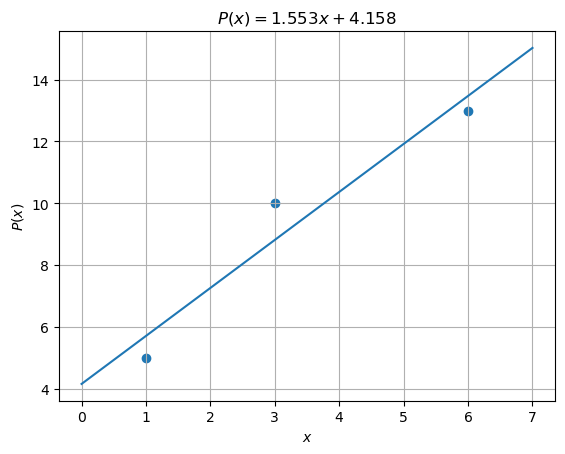

In [3]:
x,y = np.array([1,3,6]),np.array([5,10,13])

m,b = grad_abstieg(x,y,0,0,epsilon=0.01,iterationen=1000)
p = Polynom([b,m])

plt.scatter(x,y)
p.plot(plt,0,7)
plt.show()


Wir erhalten dasselbe Ergebnis!